# Exploring Hanoi and Ho Chi Minh City, Vietnam – Which city is better for coffee lovers

### 1. Introdiction

In Vietnam, coffee is more than just a drink, it is a way of life. Coffee can be found down every alleyway and around every corner on the street, from luxury cafés or simple roadside stands. If you are a coffee lover, you will find interesting to explore coffee culture in Vietnam. In this report, I will explore coffees shop in Hanoi and Ho Chi Minh City, the most two biggest cities in Vietnam based on their location, rating and price collected from Foursquare API. I also do some comparison to discuss which city is more suitable for coffee lovers. Finally, based on the data, the report will show some recommendations to visitors when they have chance to visit Hanoi and Ho Chi Minh city about some good coffee shops to enjoy coffee. 

### 2. Data collection

The data is collected from Foursquare API to create the data frame consisting top coffee shops in Hanoi and Ho Chi Minh City within a radius of 5 kilometers from the city center point. The data is sorted by rating. The data includes the location, address, price and rating of the coffee shops. 

##### Install and import package

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

In [2]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [3]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [4]:
!pip install folium
import folium # create map

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 92kB 7.5MB/s eta 0:00:011
Folium installed
Libraries imported.


##### Define Foursquare Credentials and Version

In [5]:
CLIENT_ID = 'BGIEL4HLUVKWDQUU3ZV4Z3J3L2MKY2UGTSRQZFC34KDVCTDL' # your Foursquare ID
CLIENT_SECRET = 'BYHRG5LELEISTH1EY1YCSSI42EMQB0ZZ0USMAAF5RHGB2BVT' # your Foursquare Secret
VERSION = '20200404'
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: BGIEL4HLUVKWDQUU3ZV4Z3J3L2MKY2UGTSRQZFC34KDVCTDL
CLIENT_SECRET:BYHRG5LELEISTH1EY1YCSSI42EMQB0ZZ0USMAAF5RHGB2BVT


##### Exploring Hanoi and Ho Chi Minh City, Vietnam

In [6]:
address_hn = 'Hanoi, VN'

geolocator = Nominatim(user_agent="foursquare_agent")
location_hn = geolocator.geocode(address_hn)
latitude_hn = location_hn.latitude
longitude_hn = location_hn.longitude
print(latitude_hn, longitude_hn)

21.0294498 105.8544441


In [7]:
address_hcm = 'Ho Chi Minh City, VN'

geolocator = Nominatim(user_agent="foursquare_agent")
location_hcm = geolocator.geocode(address_hcm)
latitude_hcm = location_hcm.latitude
longitude_hcm = location_hcm.longitude
print(latitude_hcm, longitude_hcm)

10.6497452 106.76197937344351


In [9]:
map_hanoi = folium.Map(location=[latitude_hn, longitude_hn], zoom_start=12)
map_hanoi

In [10]:
map_hcm = folium.Map(location=[latitude_hcm, longitude_hcm], zoom_start=12)
map_hcm

##### Collecting Coffee shops data

Coffee shops in Hanoi

In [11]:
search_query = 'coffee'
DISTANCE = 5000 #5km
LIMIT=200
print(search_query + ' .... OK!')

coffee .... OK!


In [12]:
url_hn = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_hn, longitude_hn, VERSION, search_query, DISTANCE, LIMIT)
url_hn

'https://api.foursquare.com/v2/venues/search?client_id=BGIEL4HLUVKWDQUU3ZV4Z3J3L2MKY2UGTSRQZFC34KDVCTDL&client_secret=BYHRG5LELEISTH1EY1YCSSI42EMQB0ZZ0USMAAF5RHGB2BVT&ll=21.0294498,105.8544441&v=20200404&query=coffee&radius=5000&limit=200'

In [13]:
results = requests.get(url_hn).json()
results

{'meta': {'code': 200, 'requestId': '5ea19e1c29ce6a002848287c'},
 'response': {'venues': [{'id': '58994ea4af5c1411a14a09d7',
    'name': 'Gấu Coffee Roaster',
    'location': {'address': '33 Hàng Bè',
     'lat': 21.03294,
     'lng': 105.853874,
     'labeledLatLngs': [{'label': 'display',
       'lat': 21.03294,
       'lng': 105.853874}],
     'distance': 393,
     'cc': 'VN',
     'city': 'Hà Nội',
     'state': 'Thành Phố Hà Nội',
     'country': 'Việt Nam',
     'formattedAddress': ['33 Hàng Bè',
      'Hà Nội',
      'Thành Phố Hà Nội',
      'Việt Nam']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587650502',
    'hasPerk': False},
   {'id': '4b4d4e69f964a52073d026e3',
    'name': 'Highlands Coffee',
    'location':

In [14]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,58994ea4af5c1411a14a09d7,33 Hàng Bè,VN,Hà Nội,Việt Nam,NaN,393,"[33 Hàng Bè, Hà Nội, Thành Phố Hà Nội, Việt Nam]","[{'label': 'display', 'lat': 21.03294, 'lng': ...",21.032940,105.853874,NaN,Thành Phố Hà Nội,Gấu Coffee Roaster,v-1587650502
1,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4b4d4e69f964a52073d026e3,"Hồ Gươm Plaza, 5 Đinh Tiên Hoàng",VN,Hoàn Kiếm,Việt Nam,NaN,411,"[Hồ Gươm Plaza, 5 Đinh Tiên Hoàng, Hoàn Kiếm, ...","[{'label': 'display', 'lat': 21.032027, 'lng':...",21.032027,105.851605,NaN,Thành Phố Hà Nội,Highlands Coffee,v-1587650502
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5c5161f7f427de002cd2eed3,"Sô 3 B, Hàng Tre",VN,Hà Nội,Việt Nam,NaN,485,"[Sô 3 B, Hàng Tre, Hà Nội, Thành Phố Hà Nội, V...","[{'label': 'display', 'lat': 21.03376, 'lng': ...",21.033760,105.855140,NaN,Thành Phố Hà Nội,Hidden Gem Coffee,v-1587650502
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,55e99145498eb1a84c2b9f41,23M Hai Bà Trưng,VN,Hà Nội,Việt Nam,NaN,606,"[23M Hai Bà Trưng, Hà Nội, Thành Phố Hà Nội, V...","[{'label': 'display', 'lat': 21.02415404681182...",21.024154,105.853058,NaN,Thành Phố Hà Nội,The Coffee House 23M Hai Bà Trưng,v-1587650502
4,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,50a5d0f0e4b017a2ec339753,3A Ngô Quyền,VN,Hoàn Kiếm,Việt Nam,Trần Nguyên Hãn,233,"[3A Ngô Quyền (Trần Nguyên Hãn), Hoàn Kiếm, Th...","[{'label': 'display', 'lat': 21.02856899677782...",21.028569,105.856481,NaN,Thành Phố Hà Nội,Trung Nguyen Coffee,v-1587650502


In [15]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Gấu Coffee Roaster,Coffee Shop,33 Hàng Bè,VN,Hà Nội,Việt Nam,NaN,393,"[33 Hàng Bè, Hà Nội, Thành Phố Hà Nội, Việt Nam]","[{'label': 'display', 'lat': 21.03294, 'lng': ...",21.032940,105.853874,NaN,Thành Phố Hà Nội,58994ea4af5c1411a14a09d7
1,Highlands Coffee,Café,"Hồ Gươm Plaza, 5 Đinh Tiên Hoàng",VN,Hoàn Kiếm,Việt Nam,NaN,411,"[Hồ Gươm Plaza, 5 Đinh Tiên Hoàng, Hoàn Kiếm, ...","[{'label': 'display', 'lat': 21.032027, 'lng':...",21.032027,105.851605,NaN,Thành Phố Hà Nội,4b4d4e69f964a52073d026e3
2,Hidden Gem Coffee,Coffee Shop,"Sô 3 B, Hàng Tre",VN,Hà Nội,Việt Nam,NaN,485,"[Sô 3 B, Hàng Tre, Hà Nội, Thành Phố Hà Nội, V...","[{'label': 'display', 'lat': 21.03376, 'lng': ...",21.033760,105.855140,NaN,Thành Phố Hà Nội,5c5161f7f427de002cd2eed3
3,The Coffee House 23M Hai Bà Trưng,Coffee Shop,23M Hai Bà Trưng,VN,Hà Nội,Việt Nam,NaN,606,"[23M Hai Bà Trưng, Hà Nội, Thành Phố Hà Nội, V...","[{'label': 'display', 'lat': 21.02415404681182...",21.024154,105.853058,NaN,Thành Phố Hà Nội,55e99145498eb1a84c2b9f41
4,Trung Nguyen Coffee,Café,3A Ngô Quyền,VN,Hoàn Kiếm,Việt Nam,Trần Nguyên Hãn,233,"[3A Ngô Quyền (Trần Nguyên Hãn), Hoàn Kiếm, Th...","[{'label': 'display', 'lat': 21.02856899677782...",21.028569,105.856481,NaN,Thành Phố Hà Nội,50a5d0f0e4b017a2ec339753
5,Civet Coffee,Coffee Shop,"Tầng 3, 57B Đinh Tiên Hoàng",VN,Hoàn Kiếm,Việt Nam,NaN,290,"[Tầng 3, 57B Đinh Tiên Hoàng, Hoàn Kiếm, Thành...","[{'label': 'display', 'lat': 21.03170142258372...",21.031701,105.853036,NaN,Thành Phố Hà Nội,5271d7fa11d27880bb4796ff
6,Trung Nguyên Coffee 02 Hàng Bài,Bridal Shop,02 Hàng Bài,VN,Hà Nội,Việt Nam,NaN,494,"[02 Hàng Bài, Hà Nội, Thành Phố Hà Nội, Việt Nam]","[{'label': 'display', 'lat': 21.025209, 'lng':...",21.025209,105.853029,110117,Thành Phố Hà Nội,59f3022db23dfa0dd24a4afc
7,The Coffee House 56 Bà Triệu,Burmese Restaurant,56 Bà Triệu,VN,Hà Nội,Việt Nam,NaN,889,"[56 Bà Triệu, Hà Nội, Thành Phố Hà Nội, Việt Nam]","[{'label': 'display', 'lat': 21.02235415274363...",21.022354,105.850502,NaN,Thành Phố Hà Nội,568c8be1498e246c431b0910
8,Drew Coffee,Coffee Shop,58 Nguyen Huu Huan,VN,Hà Nội,Việt Nam,NaN,431,"[58 Nguyen Huu Huan, Hà Nội, Thành Phố Hà Nội,...","[{'label': 'display', 'lat': 21.033324, 'lng':...",21.033324,105.854401,100000,Thành Phố Hà Nội,57270969498e1fbd43b0a8d7
9,Molly's Coffee Annex,Café,23 Gia Ngư,VN,Hoàn Kiếm,Việt Nam,NaN,428,"[23 Gia Ngư, Hoàn Kiếm, Thành Phố Hà Nội, Việt...","[{'label': 'display', 'lat': 21.03299140930175...",21.032991,105.852821,NaN,Thành Phố Hà Nội,529ead2e11d2f7dc07211a2b


In [16]:
dataframe_filtered.name

0                        Gấu Coffee Roaster
1                          Highlands Coffee
2                         Hidden Gem Coffee
3         The Coffee House 23M Hai Bà Trưng
4                       Trung Nguyen Coffee
5                              Civet Coffee
6          Trung Nguyên  Coffee 02 Hàng Bài
7              The Coffee House 56 Bà Triệu
8                               Drew Coffee
9                      Molly's Coffee Annex
10                         Highlands Coffee
11                           Coffee Xuân 56
12                               Alo Coffee
13                               Han Coffee
14                            Tonkin Coffee
15                         Highlands Coffee
16                      Diiing&Drink Coffee
17                           Tam Lộc Coffee
18                           Barista Coffee
19                             Delio Coffee
20                 Tryst - The Coffee House
21                   Coffee Bean & Tea Leaf
22                         Highl

In [17]:
hanoi_map = folium.Map(location=[latitude_hn, longitude_hn], zoom_start=12) # generate map centred around the City Center

# add a red circle marker to represent the Conrad Hotel
folium.Marker(
    [latitude_hn, longitude_hn],
    radius=5,
    color='red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hanoi_map)

# add the cafe and coffee shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.Marker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hanoi_map)

# display map
hanoi_map

Coffee shops in Ho Chi Minh City

In [18]:
search=['cafe','coffee']

In [19]:
url_hcm = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_hcm, longitude_hcm, VERSION, search, DISTANCE, LIMIT)
url_hcm

"https://api.foursquare.com/v2/venues/search?client_id=BGIEL4HLUVKWDQUU3ZV4Z3J3L2MKY2UGTSRQZFC34KDVCTDL&client_secret=BYHRG5LELEISTH1EY1YCSSI42EMQB0ZZ0USMAAF5RHGB2BVT&ll=10.6497452,106.76197937344351&v=20200404&query=['cafe', 'coffee']&radius=5000&limit=200"

In [20]:
results = requests.get(url_hcm).json()
results

{'meta': {'code': 200, 'requestId': '5ea19f936d8c560027284b48'},
 'response': {'venues': [{'id': '4dc60e7dd22dafda2fb5c302',
    'name': 'Cafe Điểm Hẹn',
    'location': {'lat': 10.664312501520154,
     'lng': 106.77637433024034,
     'labeledLatLngs': [{'label': 'display',
       'lat': 10.664312501520154,
       'lng': 106.77637433024034}],
     'distance': 2260,
     'cc': 'VN',
     'state': 'HCMC',
     'country': 'Việt Nam',
     'formattedAddress': ['HCMC', 'Việt Nam']},
    'categories': [{'id': '4bf58dd8d48988d16d941735',
      'name': 'Café',
      'pluralName': 'Cafés',
      'shortName': 'Café',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587650525',
    'hasPerk': False},
   {'id': '504756abe4b0eef419a716ef',
    'name': 'Café Nguyệt Ánh',
    'location': {'lat': 10.68159,
     'lng': 106.747621,
     'labeledLatLngs': [{'label': 'display',
       'lat': 10.68159,
   

In [21]:
# assign relevant part of JSON to venues
hcm_venues = results['response']['venues']

# tranform venues into a dataframe
dataframe_hcm = json_normalize(hcm_venues)
dataframe_hcm.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4dc60e7dd22dafda2fb5c302,NaN,VN,NaN,Việt Nam,NaN,2260,"[HCMC, Việt Nam]","[{'label': 'display', 'lat': 10.66431250152015...",10.664313,106.776374,HCMC,Cafe Điểm Hẹn,v-1587650525
1,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,504756abe4b0eef419a716ef,NaN,VN,NaN,Việt Nam,NaN,3877,[Việt Nam],"[{'label': 'display', 'lat': 10.68159, 'lng': ...",10.681590,106.747621,NaN,Café Nguyệt Ánh,v-1587650525
2,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,50c86a00e4b032ee28c6532b,NaN,VN,NaN,Việt Nam,NaN,5888,[Việt Nam],"[{'label': 'display', 'lat': 10.69775789258387...",10.697758,106.739391,NaN,Café Sóng Nhạc,v-1587650525
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4c399f612c8020a189fb8c00,Đường Rừng Sát,VN,NaN,Việt Nam,NaN,2246,"[Đường Rừng Sát, TPHCM, Việt Nam]","[{'label': 'display', 'lat': 10.662337, 'lng':...",10.662337,106.778026,TPHCM,Coffee Ba Nhẫn,v-1587650525
4,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4ee192fe775b247302dd99bd,Huynh Tan Phat,VN,Thành phố Hồ Chí Minh,Việt Nam,NaN,5769,"[Huynh Tan Phat, Thành phố Hồ Chí Minh, Thành ...","[{'label': 'display', 'lat': 10.69512771788386...",10.695128,106.736500,Thành phố Hồ Chí Minh,Cafe Thanh Thao,v-1587650525


In [22]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_hcm = ['name', 'categories'] + [col for col in dataframe_hcm.columns if col.startswith('location.')] + ['id']
dataframe_filtered_hcm = dataframe_hcm.loc[:, filtered_columns_hcm]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list_hcm = row['categories']
    except:
        categories_list_hcm = row['venue.categories']
        
    if len(categories_list_hcm) == 0:
        return None
    else:
        return categories_list_hcm[0]['name']

# filter the category for each row
dataframe_filtered_hcm['categories'] = dataframe_filtered_hcm.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_hcm.columns = [column.split('.')[-1] for column in dataframe_filtered_hcm.columns]

dataframe_filtered_hcm

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Cafe Điểm Hẹn,Café,NaN,VN,NaN,Việt Nam,NaN,2260,"[HCMC, Việt Nam]","[{'label': 'display', 'lat': 10.66431250152015...",10.664313,106.776374,HCMC,4dc60e7dd22dafda2fb5c302
1,Café Nguyệt Ánh,Café,NaN,VN,NaN,Việt Nam,NaN,3877,[Việt Nam],"[{'label': 'display', 'lat': 10.68159, 'lng': ...",10.681590,106.747621,NaN,504756abe4b0eef419a716ef
2,Café Sóng Nhạc,Café,NaN,VN,NaN,Việt Nam,NaN,5888,[Việt Nam],"[{'label': 'display', 'lat': 10.69775789258387...",10.697758,106.739391,NaN,50c86a00e4b032ee28c6532b
3,Coffee Ba Nhẫn,Coffee Shop,Đường Rừng Sát,VN,NaN,Việt Nam,NaN,2246,"[Đường Rừng Sát, TPHCM, Việt Nam]","[{'label': 'display', 'lat': 10.662337, 'lng':...",10.662337,106.778026,TPHCM,4c399f612c8020a189fb8c00
4,Cafe Thanh Thao,Café,Huynh Tan Phat,VN,Thành phố Hồ Chí Minh,Việt Nam,NaN,5769,"[Huynh Tan Phat, Thành phố Hồ Chí Minh, Thành ...","[{'label': 'display', 'lat': 10.69512771788386...",10.695128,106.736500,Thành phố Hồ Chí Minh,4ee192fe775b247302dd99bd
5,Cafe - Trà Phi Long,Café,NaN,VN,NaN,Việt Nam,NaN,5829,"[Thành phố Hồ Chí Minh, Việt Nam]","[{'label': 'display', 'lat': 10.697157, 'lng':...",10.697157,106.739360,Thành phố Hồ Chí Minh,5898546b34935539da794a9d
6,Café Suối Mơ,Café,1915 Huỳnh Tấn Phát Huyện Nhà Bè,VN,Tp. Hồ Chí Minh,Việt Nam,NaN,5961,"[1915 Huỳnh Tấn Phát Huyện Nhà Bè, Tp. Hồ Ch...","[{'label': 'display', 'lat': 10.69838571240415...",10.698386,106.739183,NaN,51440905e4b0a40e37a2278d
7,Cafe Hello,Café,"Nguyễn Bình, Nhơn Đức, Nhà Bè, Tp.HCM",VN,NaN,Việt Nam,NaN,7379,"[Nguyễn Bình, Nhơn Đức, Nhà Bè, Tp.HCM, Việt Nam]","[{'label': 'display', 'lat': 10.679562, 'lng':...",10.679562,106.701731,NaN,50b9f1b9e4b05175d38f24ce
8,Cafeine,Café,"A3 Eratown, Nguyễn Lương Bằng, Phú Mỹ, Q 7",VN,Hồ Chí Minh,Việt Nam,NaN,6488,"[A3 Eratown, Nguyễn Lương Bằng, Phú Mỹ, Q 7, H...","[{'label': 'display', 'lat': 10.70014981769882...",10.700150,106.732192,HCM,55057db4498ef840233e6e64
9,Ka Coffee,Coffee Shop,"789A Đường Huỳnh Tấn Phát, Xã Phú Xuân, H. Nhà Bè",VN,Thành phố Hồ Chí Minh,Việt Nam,Hẻm 2637,3300,"[789A Đường Huỳnh Tấn Phát, Xã Phú Xuân, H. Nh...","[{'label': 'display', 'lat': 10.678325, 'lng':...",10.678325,106.753959,Thành phố Hồ Chí Minh,5e461238f17d04000753d818


In [23]:
dataframe_filtered_hcm.name

0                Cafe Điểm Hẹn
1              Café Nguyệt Ánh
2               Café Sóng Nhạc
3               Coffee Ba Nhẫn
4              Cafe Thanh Thao
5          Cafe - Trà Phi Long
6                 Café Suối Mơ
7                   Cafe Hello
8                      Cafeine
9                    Ka Coffee
10               De NAM Coffee
11                  929 Coffee
12    Nha Hang Cafe Co Gia Quy
13            Thiên Đường cafe
Name: name, dtype: object

In [24]:
hcm_map = folium.Map(location=[latitude_hcm, longitude_hcm], zoom_start=12) # generate map centred around the City Center

# add a red circle marker to represent the Conrad Hotel
folium.Marker(
    [latitude_hcm, longitude_hcm],
    radius=5,
    color='red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hcm_map)

# add the cafe and coffee shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered_hcm.lat, dataframe_filtered_hcm.lng, dataframe_filtered_hcm.categories):
    folium.Marker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hcm_map)

# display map
hcm_map

Combine the two datasets.



In [25]:
dataset = pd.concat([dataframe_filtered, dataframe_filtered_hcm], axis = 0)
dataset


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,postalCode,state
0,33 Hàng Bè,Coffee Shop,VN,Hà Nội,Việt Nam,NaN,393,"[33 Hàng Bè, Hà Nội, Thành Phố Hà Nội, Việt Nam]",58994ea4af5c1411a14a09d7,"[{'label': 'display', 'lat': 21.03294, 'lng': ...",21.032940,105.853874,Gấu Coffee Roaster,NaN,Thành Phố Hà Nội
1,"Hồ Gươm Plaza, 5 Đinh Tiên Hoàng",Café,VN,Hoàn Kiếm,Việt Nam,NaN,411,"[Hồ Gươm Plaza, 5 Đinh Tiên Hoàng, Hoàn Kiếm, ...",4b4d4e69f964a52073d026e3,"[{'label': 'display', 'lat': 21.032027, 'lng':...",21.032027,105.851605,Highlands Coffee,NaN,Thành Phố Hà Nội
2,"Sô 3 B, Hàng Tre",Coffee Shop,VN,Hà Nội,Việt Nam,NaN,485,"[Sô 3 B, Hàng Tre, Hà Nội, Thành Phố Hà Nội, V...",5c5161f7f427de002cd2eed3,"[{'label': 'display', 'lat': 21.03376, 'lng': ...",21.033760,105.855140,Hidden Gem Coffee,NaN,Thành Phố Hà Nội
3,23M Hai Bà Trưng,Coffee Shop,VN,Hà Nội,Việt Nam,NaN,606,"[23M Hai Bà Trưng, Hà Nội, Thành Phố Hà Nội, V...",55e99145498eb1a84c2b9f41,"[{'label': 'display', 'lat': 21.02415404681182...",21.024154,105.853058,The Coffee House 23M Hai Bà Trưng,NaN,Thành Phố Hà Nội
4,3A Ngô Quyền,Café,VN,Hoàn Kiếm,Việt Nam,Trần Nguyên Hãn,233,"[3A Ngô Quyền (Trần Nguyên Hãn), Hoàn Kiếm, Th...",50a5d0f0e4b017a2ec339753,"[{'label': 'display', 'lat': 21.02856899677782...",21.028569,105.856481,Trung Nguyen Coffee,NaN,Thành Phố Hà Nội
5,"Tầng 3, 57B Đinh Tiên Hoàng",Coffee Shop,VN,Hoàn Kiếm,Việt Nam,NaN,290,"[Tầng 3, 57B Đinh Tiên Hoàng, Hoàn Kiếm, Thành...",5271d7fa11d27880bb4796ff,"[{'label': 'display', 'lat': 21.03170142258372...",21.031701,105.853036,Civet Coffee,NaN,Thành Phố Hà Nội
6,02 Hàng Bài,Bridal Shop,VN,Hà Nội,Việt Nam,NaN,494,"[02 Hàng Bài, Hà Nội, Thành Phố Hà Nội, Việt Nam]",59f3022db23dfa0dd24a4afc,"[{'label': 'display', 'lat': 21.025209, 'lng':...",21.025209,105.853029,Trung Nguyên Coffee 02 Hàng Bài,110117,Thành Phố Hà Nội
7,56 Bà Triệu,Burmese Restaurant,VN,Hà Nội,Việt Nam,NaN,889,"[56 Bà Triệu, Hà Nội, Thành Phố Hà Nội, Việt Nam]",568c8be1498e246c431b0910,"[{'label': 'display', 'lat': 21.02235415274363...",21.022354,105.850502,The Coffee House 56 Bà Triệu,NaN,Thành Phố Hà Nội
8,58 Nguyen Huu Huan,Coffee Shop,VN,Hà Nội,Việt Nam,NaN,431,"[58 Nguyen Huu Huan, Hà Nội, Thành Phố Hà Nội,...",57270969498e1fbd43b0a8d7,"[{'label': 'display', 'lat': 21.033324, 'lng':...",21.033324,105.854401,Drew Coffee,100000,Thành Phố Hà Nội
9,23 Gia Ngư,Café,VN,Hoàn Kiếm,Việt Nam,NaN,428,"[23 Gia Ngư, Hoàn Kiếm, Thành Phố Hà Nội, Việt...",529ead2e11d2f7dc07211a2b,"[{'label': 'display', 'lat': 21.03299140930175...",21.032991,105.852821,Molly's Coffee Annex,NaN,Thành Phố Hà Nội


In [26]:
for col in dataset.columns: 
    print(col) 

address
categories
cc
city
country
crossStreet
distance
formattedAddress
id
labeledLatLngs
lat
lng
name
postalCode
state


In [27]:
data=dataset.drop(columns=['cc', 'country','crossStreet','formattedAddress','labeledLatLngs','postalCode','state'])
data.head()

,address,categories,city,distance,id,lat,lng,name
0,33 Hàng Bè,Coffee Shop,Hà Nội,393,58994ea4af5c1411a14a09d7,21.032940,105.853874,Gấu Coffee Roaster
1,"Hồ Gươm Plaza, 5 Đinh Tiên Hoàng",Café,Hoàn Kiếm,411,4b4d4e69f964a52073d026e3,21.032027,105.851605,Highlands Coffee
2,"Sô 3 B, Hàng Tre",Coffee Shop,Hà Nội,485,5c5161f7f427de002cd2eed3,21.033760,105.855140,Hidden Gem Coffee
3,23M Hai Bà Trưng,Coffee Shop,Hà Nội,606,55e99145498eb1a84c2b9f41,21.024154,105.853058,The Coffee House 23M Hai Bà Trưng
4,3A Ngô Quyền,Café,Hoàn Kiếm,233,50a5d0f0e4b017a2ec339753,21.028569,105.856481,Trung Nguyen Coffee


Move "name" to the first column

In [28]:
cols = list(data)
cols.insert(0, cols.pop(cols.index('name')))
data = data.ix[:, cols]
data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


,name,address,categories,city,distance,id,lat,lng
0,Gấu Coffee Roaster,33 Hàng Bè,Coffee Shop,Hà Nội,393,58994ea4af5c1411a14a09d7,21.032940,105.853874
1,Highlands Coffee,"Hồ Gươm Plaza, 5 Đinh Tiên Hoàng",Café,Hoàn Kiếm,411,4b4d4e69f964a52073d026e3,21.032027,105.851605
2,Hidden Gem Coffee,"Sô 3 B, Hàng Tre",Coffee Shop,Hà Nội,485,5c5161f7f427de002cd2eed3,21.033760,105.855140
3,The Coffee House 23M Hai Bà Trưng,23M Hai Bà Trưng,Coffee Shop,Hà Nội,606,55e99145498eb1a84c2b9f41,21.024154,105.853058
4,Trung Nguyen Coffee,3A Ngô Quyền,Café,Hoàn Kiếm,233,50a5d0f0e4b017a2ec339753,21.028569,105.856481


Get the rating from ID

In [29]:
venues_ids= data['id']

In [30]:
ratings=[]
for venue_id in venues_ids:
    url2 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

In [31]:
result2 = requests.get(url2).json()
    

In [32]:
try:
    venues_rating=result2['response']['venue']['rating']
    ratings=ratings+[venues_rating]
except:
    print('No data available for id=',id)

No data available for id= <built-in function id>


Because the Foursquare data does not give the rating information for these coffee shops, I will add ratings from other data source.

In [33]:
rating=[4.3,4.2,4.8,4.4,4.2,4.2,4,4.4,4.3,4.5,4,4.1,3,4.3,4.1,4,4.4,3.9,4.5,4.1,4.2,4.5,3.9,4,4.2,4.1,4,3.9,3.8,4.2,4.1,4.5,4.6,4.3,3.9,4,4.1,4.2,4.3,4.5,3.8,4.6,4.3,4.1,4,4.5,3.8,4.5,4.3,4.1,4.3,4.1,4,4.3,3.9,4,4.1,3.9,4.1,4,3.8,4.1,4.2,3.9]

In [34]:
data['rating']=rating

In [35]:
data

,name,address,categories,city,distance,id,lat,lng,rating
0,Gấu Coffee Roaster,33 Hàng Bè,Coffee Shop,Hà Nội,393,58994ea4af5c1411a14a09d7,21.032940,105.853874,4.3
1,Highlands Coffee,"Hồ Gươm Plaza, 5 Đinh Tiên Hoàng",Café,Hoàn Kiếm,411,4b4d4e69f964a52073d026e3,21.032027,105.851605,4.2
2,Hidden Gem Coffee,"Sô 3 B, Hàng Tre",Coffee Shop,Hà Nội,485,5c5161f7f427de002cd2eed3,21.033760,105.855140,4.8
3,The Coffee House 23M Hai Bà Trưng,23M Hai Bà Trưng,Coffee Shop,Hà Nội,606,55e99145498eb1a84c2b9f41,21.024154,105.853058,4.4
4,Trung Nguyen Coffee,3A Ngô Quyền,Café,Hoàn Kiếm,233,50a5d0f0e4b017a2ec339753,21.028569,105.856481,4.2
5,Civet Coffee,"Tầng 3, 57B Đinh Tiên Hoàng",Coffee Shop,Hoàn Kiếm,290,5271d7fa11d27880bb4796ff,21.031701,105.853036,4.2
6,Trung Nguyên Coffee 02 Hàng Bài,02 Hàng Bài,Bridal Shop,Hà Nội,494,59f3022db23dfa0dd24a4afc,21.025209,105.853029,4.0
7,The Coffee House 56 Bà Triệu,56 Bà Triệu,Burmese Restaurant,Hà Nội,889,568c8be1498e246c431b0910,21.022354,105.850502,4.4
8,Drew Coffee,58 Nguyen Huu Huan,Coffee Shop,Hà Nội,431,57270969498e1fbd43b0a8d7,21.033324,105.854401,4.3
9,Molly's Coffee Annex,23 Gia Ngư,Café,Hoàn Kiếm,428,529ead2e11d2f7dc07211a2b,21.032991,105.852821,4.5


Cleaning data: Replace the "city" of 50 first coffee shop by "Hanoi" and the "city" of bottom 14 coffee shop by "Ho Chi Minh City"

In [36]:
data_hanoi=data[0:50]
data_hanoi

,name,address,categories,city,distance,id,lat,lng,rating
0,Gấu Coffee Roaster,33 Hàng Bè,Coffee Shop,Hà Nội,393,58994ea4af5c1411a14a09d7,21.032940,105.853874,4.3
1,Highlands Coffee,"Hồ Gươm Plaza, 5 Đinh Tiên Hoàng",Café,Hoàn Kiếm,411,4b4d4e69f964a52073d026e3,21.032027,105.851605,4.2
2,Hidden Gem Coffee,"Sô 3 B, Hàng Tre",Coffee Shop,Hà Nội,485,5c5161f7f427de002cd2eed3,21.033760,105.855140,4.8
3,The Coffee House 23M Hai Bà Trưng,23M Hai Bà Trưng,Coffee Shop,Hà Nội,606,55e99145498eb1a84c2b9f41,21.024154,105.853058,4.4
4,Trung Nguyen Coffee,3A Ngô Quyền,Café,Hoàn Kiếm,233,50a5d0f0e4b017a2ec339753,21.028569,105.856481,4.2
5,Civet Coffee,"Tầng 3, 57B Đinh Tiên Hoàng",Coffee Shop,Hoàn Kiếm,290,5271d7fa11d27880bb4796ff,21.031701,105.853036,4.2
6,Trung Nguyên Coffee 02 Hàng Bài,02 Hàng Bài,Bridal Shop,Hà Nội,494,59f3022db23dfa0dd24a4afc,21.025209,105.853029,4.0
7,The Coffee House 56 Bà Triệu,56 Bà Triệu,Burmese Restaurant,Hà Nội,889,568c8be1498e246c431b0910,21.022354,105.850502,4.4
8,Drew Coffee,58 Nguyen Huu Huan,Coffee Shop,Hà Nội,431,57270969498e1fbd43b0a8d7,21.033324,105.854401,4.3
9,Molly's Coffee Annex,23 Gia Ngư,Café,Hoàn Kiếm,428,529ead2e11d2f7dc07211a2b,21.032991,105.852821,4.5


In [37]:
data_hanoi_new=data_hanoi.drop(columns=['city'])

In [38]:
data_hanoi_new['city']='hanoi'


In [39]:
data_hcm=data[50:64]

In [40]:
data_hcm_new=data_hcm.drop(columns=['city'])

In [41]:
data_hcm_new['city']='ho_chi_minh_city'


In [42]:
final_data=pd.concat([data_hanoi_new, data_hcm_new], axis = 0)


In [43]:
cols = list(final_data)
cols.insert(0, cols.pop(cols.index('name')))
final_data = final_data.ix[:, cols]
final_data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


,name,address,categories,distance,id,lat,lng,rating,city
0,Gấu Coffee Roaster,33 Hàng Bè,Coffee Shop,393,58994ea4af5c1411a14a09d7,21.032940,105.853874,4.3,hanoi
1,Highlands Coffee,"Hồ Gươm Plaza, 5 Đinh Tiên Hoàng",Café,411,4b4d4e69f964a52073d026e3,21.032027,105.851605,4.2,hanoi
2,Hidden Gem Coffee,"Sô 3 B, Hàng Tre",Coffee Shop,485,5c5161f7f427de002cd2eed3,21.033760,105.855140,4.8,hanoi
3,The Coffee House 23M Hai Bà Trưng,23M Hai Bà Trưng,Coffee Shop,606,55e99145498eb1a84c2b9f41,21.024154,105.853058,4.4,hanoi
4,Trung Nguyen Coffee,3A Ngô Quyền,Café,233,50a5d0f0e4b017a2ec339753,21.028569,105.856481,4.2,hanoi


## 3. Data analysis and findings

### 3.1. Comparing coffee shops in Hanoi and Ho Chi Minh City 

There are 50 coffee shops in Hanoi and 14 coffee shops in Ho Chi Minh City are presented in the data framed scraped from Foursquare API. So, within radius of 5km from the city center, visitors can find more coffee shops in Hanoi than in Ho Chi Minh City. 

##### Create box plot to visualize coffee shop ratings in Hanoi and Ho Chi Minh city 

In [44]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [45]:
! pip install seaborn

In [46]:
import seaborn as sns
%matplotlib inline 

In [47]:
print(data.dtypes)

name           object
address        object
categories     object
city           object
distance        int64
id             object
lat           float64
lng           float64
rating        float64
dtype: object


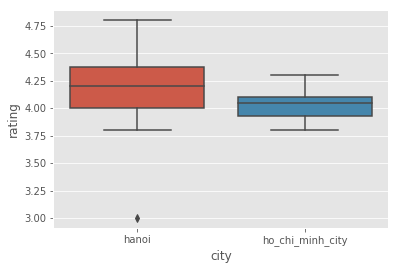

In [48]:
sns.boxplot(x="city", y="rating", data=final_data)

Calculating mean of rating 

In [49]:
final_data.groupby('city')['rating'].mean()

city
hanoi               4.18
ho_chi_minh_city    4.05
Name: rating, dtype: float64

In [50]:
grouped_test=final_data[['city', 'rating']].groupby(['city'])
grouped_test.head(2)

,city,rating
0,hanoi,4.3
1,hanoi,4.2
0,ho_chi_minh_city,4.3
1,ho_chi_minh_city,4.1


In [58]:
from scipy import stats

In [59]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('hanoi')['rating'], grouped_test.get_group('ho_chi_minh_city')['rating'])  


In [60]:
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 2.5957672706681794 , P = 0.11222930597161175


#### 3.2.	Correlation between the distance and rating

Vietnamese people say that the best products are mostly located in the city center. Now I will do some test to see the relation between the distance between the coffee shop and the city center point. 

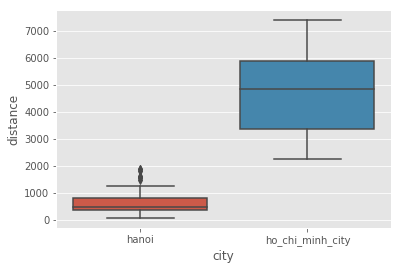

In [55]:
sns.boxplot(x="city", y="distance", data=final_data)

In [61]:
grouped_test2=final_data[['city', 'distance']].groupby(['city'])
f_val2, p_val2 = stats.f_oneway(grouped_test2.get_group('hanoi')['distance'], grouped_test2.get_group('ho_chi_minh_city')['distance'])  
print( "ANOVA results: F=", f_val2, ", P =", p_val2 )

ANOVA results: F= 227.00986074798226 , P = 2.1401407216469316e-22


In [57]:
final_data.corr()

,distance,lat,lng,rating
distance,1.000000,-0.885691,0.877667,-0.228009
lat,-0.885691,1.000000,-0.999677,0.200291
lng,0.877667,-0.999677,1.000000,-0.196068
rating,-0.228009,0.200291,-0.196068,1.000000


Let's calculate the  Pearson Correlation Coefficient and P-value of 'distance' and 'rating'. 

In [62]:
pearson_coef, p_value = stats.pearsonr(final_data['distance'], final_data['rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.22800923351902433  with a P-value of P = 0.06997484803945042


Since the p-value is smaller than 0.1, the correlation between wheel-base and price is statistically significant with the reliability of 96%. The coefficient of ~ -0.255 shows that the relationship is negative.

Linear relationship between distance and rating
The data in both Hanoi and Ho Chi Minh City also show the negative relationship between distance and rating. It mean that the coffee shops near the city center point have higher ratings. 

In both city

(0, 4.896930726579745)

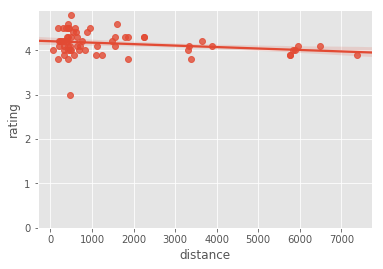

In [64]:
sns.regplot(x="distance", y="rating", data=final_data)
plt.ylim(0,)

In Hanoi

(0, 4.8969782008830025)

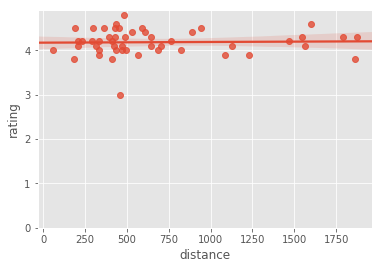

In [65]:
sns.regplot(x="distance", y="rating", data=data_hanoi_new)
plt.ylim(0,)

In Ho Chi Minh city 

(0, 4.3317611754966885)

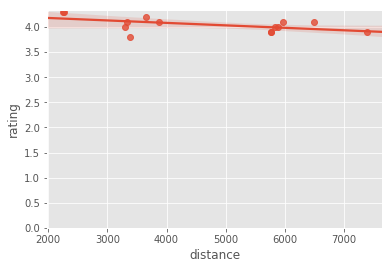

In [66]:
sns.regplot(x="distance", y="rating", data=data_hcm_new)
plt.ylim(0,)

### 4. Summary and Conclustion

The ANOVA test result shows that Coffee shops in Hanoi have higher ratings, which presents that Hanoi is better choices for coffee lovers. Some Coffee shops that have high ratings in Hanoi include Hidden Gem Coffee (at No 3B, Hàng Tre St), Molly's Coffee Annex (23 Gia Ngư St), Otree Coffee (at 71 Nguyen Du St). 



Besides, I also investigate the relationship between distance and rating. The result show that the coffee shops that are near the city center point have higher rating. Therefore, it is quite easy the foreign people when they visit Hanoi or Ho Chi Minh City to find the good coffee shops near their accommodation. 